# Shaded Topography/Relief

Created and tested by A. Newman on 9/23/2022

Many plots can be helped by showing shaded relief to relate surface geomorphic structure either by itself or with other data.  

A bit of caution!  Once you learn and are capable of doing these plots, there is a tendancy to overuse it.  Remember, only show on a plot what is necessary to convey ideas.  Other information is noise that detracts from the work.

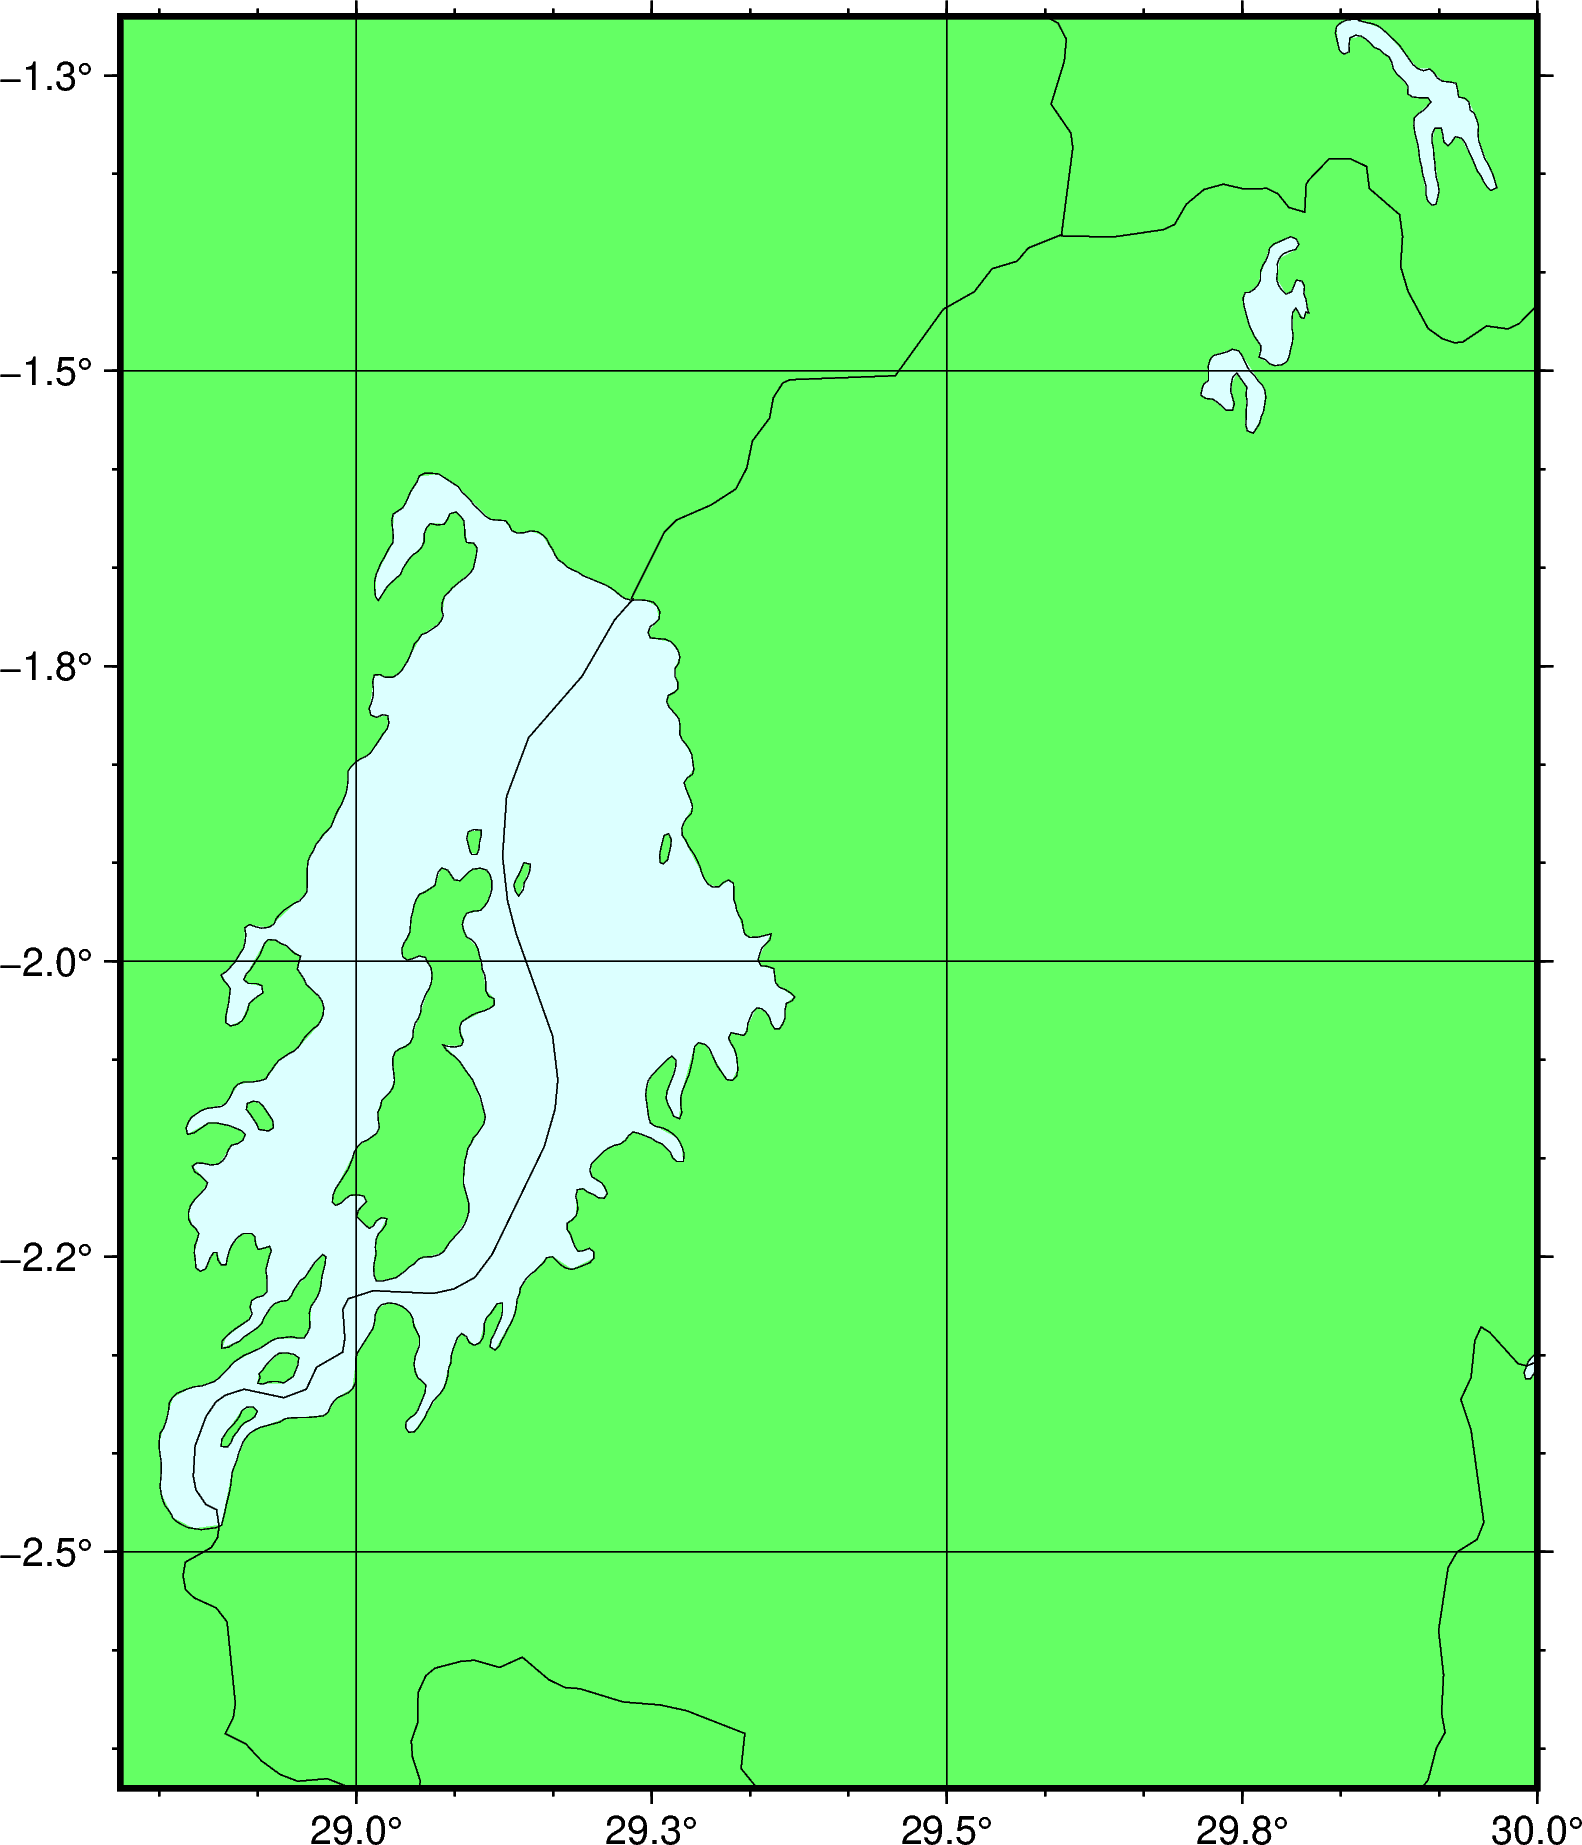

In [1]:
# Rwanda-Kivu Rift region
# we will start by making a prelim plot to assure that this is the region we want

import pygmt
xmin=28.8; xmax=30; ymin=-2.7;ymax=-1.2
region=[xmin,xmax,ymin,ymax]

fig1=pygmt.Figure()

pygmt.config(MAP_FRAME_TYPE="plain", # no alternating B&W 
             FORMAT_GEO_MAP='ddd.x') # decimal degrees
fig1.coast(region=region,  # xmin,xmax,ymin,ymax
           frame=['p','WSen','xa0.1g.5', 'ya.1g.5'], 
           land='100/255/100', water='220/255/255',
           resolution='h', 
           borders=1
          )
fig1.coast(shorelines=['1/0.2p','2/0.2p','3/0.2p','4/0.05p'],
           resolution='f'
          )


fig1.show()

### Download high-resolution DEM
**S**huttle **R**adar **T**opography **M**ission high resolution data are available through the `elevation` package.  We will request only what we need

In [3]:
import elevation
import os

# gets proper path declaration independent of OS
# this will default to the global 90m resolution --way big enough for us
DEM=os.path.join(os.getcwd(),'mapdata','Rwanda_DEM.tif') 

# should define product='SRTM3' = 90m data (3arcsec), otherwise will default to 1arcsec
elevation.clip(bounds=(xmin,ymin,xmax,ymax),output=DEM,product='SRTM3')
elevation.clean()  # allows us to rerun get command

print(pygmt.grdinfo(DEM)) # shows useful information about the grid file

make: Nothing to be done for `download'.
make: Nothing to be done for `all'.
cp SRTM3.vrt SRTM3.9a7661c09e3c40d088d0b8d18ac06a5f.vrt
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 -projwin 28.8 -1.2 30.0 -2.7 SRTM3.9a7661c09e3c40d088d0b8d18ac06a5f.vrt /Users/robel/Dropbox (GaTech)/Teaching/MathCodeReview/pyGMT-Tutorial/mapdata/Rwanda_DEM.tif


/bin/sh: -c: line 0: syntax error near unexpected token `('
/bin/sh: -c: line 0: `gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 -projwin 28.8 -1.2 30.0 -2.7 SRTM3.9a7661c09e3c40d088d0b8d18ac06a5f.vrt /Users/robel/Dropbox (GaTech)/Teaching/MathCodeReview/pyGMT-Tutorial/mapdata/Rwanda_DEM.tif'
make: *** [clip] Error 2


CalledProcessError: Command 'make -C /Users/robel/Library/Caches/elevation/SRTM3 clip OUTPUT="/Users/robel/Dropbox (GaTech)/Teaching/MathCodeReview/pyGMT-Tutorial/mapdata/Rwanda_DEM.tif" PROJWIN="28.8 -1.2 30.0 -2.7" RUN_ID="9a7661c09e3c40d088d0b8d18ac06a5f"' returned non-zero exit status 2.

## Create initial DEM plot 
to assure things are working.  

Default GMT CPT choices are [shown here](https://docs.generic-mapping-tools.org/latest/cookbook/cpts.html#of-colors-and-color-legends)

In [3]:
fig2=pygmt.Figure()

fig2.grdimage(DEM,cmap=True) # Use globe version (all high elev.)
fig2.coast(region=[xmin,xmax,ymin,ymax],  # xmin,xmax,ymin,ymax
    frame=['p','WSen','xa0.1g.5', 'ya.1g.5'], 
    resolution='h', 
    borders='1/0.5p'
    )
fig2.coast(shorelines=['1/0.2p','2/0.2p','3/0.2p','4/0.05p'],
    resolution='f'
    )
fig2.colorbar(
    position="jBC", 
    box="+gwhite+p2,black", # white fill
    frame=['x+lElevation','y+l[m]']
)
        
fig2.show()

NameError: name 'DEM' is not defined

## another attempt
will add default shading and use a more familiar color pallete

In [4]:
fig3=pygmt.Figure()

pygmt.config(MAP_FRAME_TYPE="plain", # no alternating B&W frame
             FORMAT_GEO_MAP='ddd.x') # decimal degrees

pygmt.makecpt(series=[500,4500,500],  #create a topo cpt just for this range (500-4500m)
              continuous=True,
              cmap='topo')

fig3.grdimage(DEM,cmap=True,shading=True) # Use globe version (all high elev.)
fig3.coast(region=[xmin,xmax,ymin,ymax],  # xmin,xmax,ymin,ymax
    frame=['p','WSen','xa0.1g.5', 'ya.1g.5'], 
    resolution='h', 
    borders='1/0.5p'
    )
fig3.coast(shorelines=['1/0.2p','2/0.2p','3/0.2p','4/0.05p'],
    resolution='f'
    )
fig3.colorbar(
    position="jBC", 
    box="+gwhite+p2,black", # white fill
    frame=['x+lElevation','y+l[m]']
    )

fig3.show()

NameError: name 'DEM' is not defined

## take a closer look at the topography data


In [5]:
azimgrd=os.path.join(os.getcwd(),'mapdata','Rwanda_DEM_azim.grd') 
slopegrd=os.path.join(os.getcwd(),'mapdata','Rwanda_DEM_slope.grd') 

pygmt.grdgradient(DEM,
                 direction='a',
                 outgrid=azimgrd,
                 slope_file=slopegrd
                 )
#pygmt.grdinfo(slopegrd)

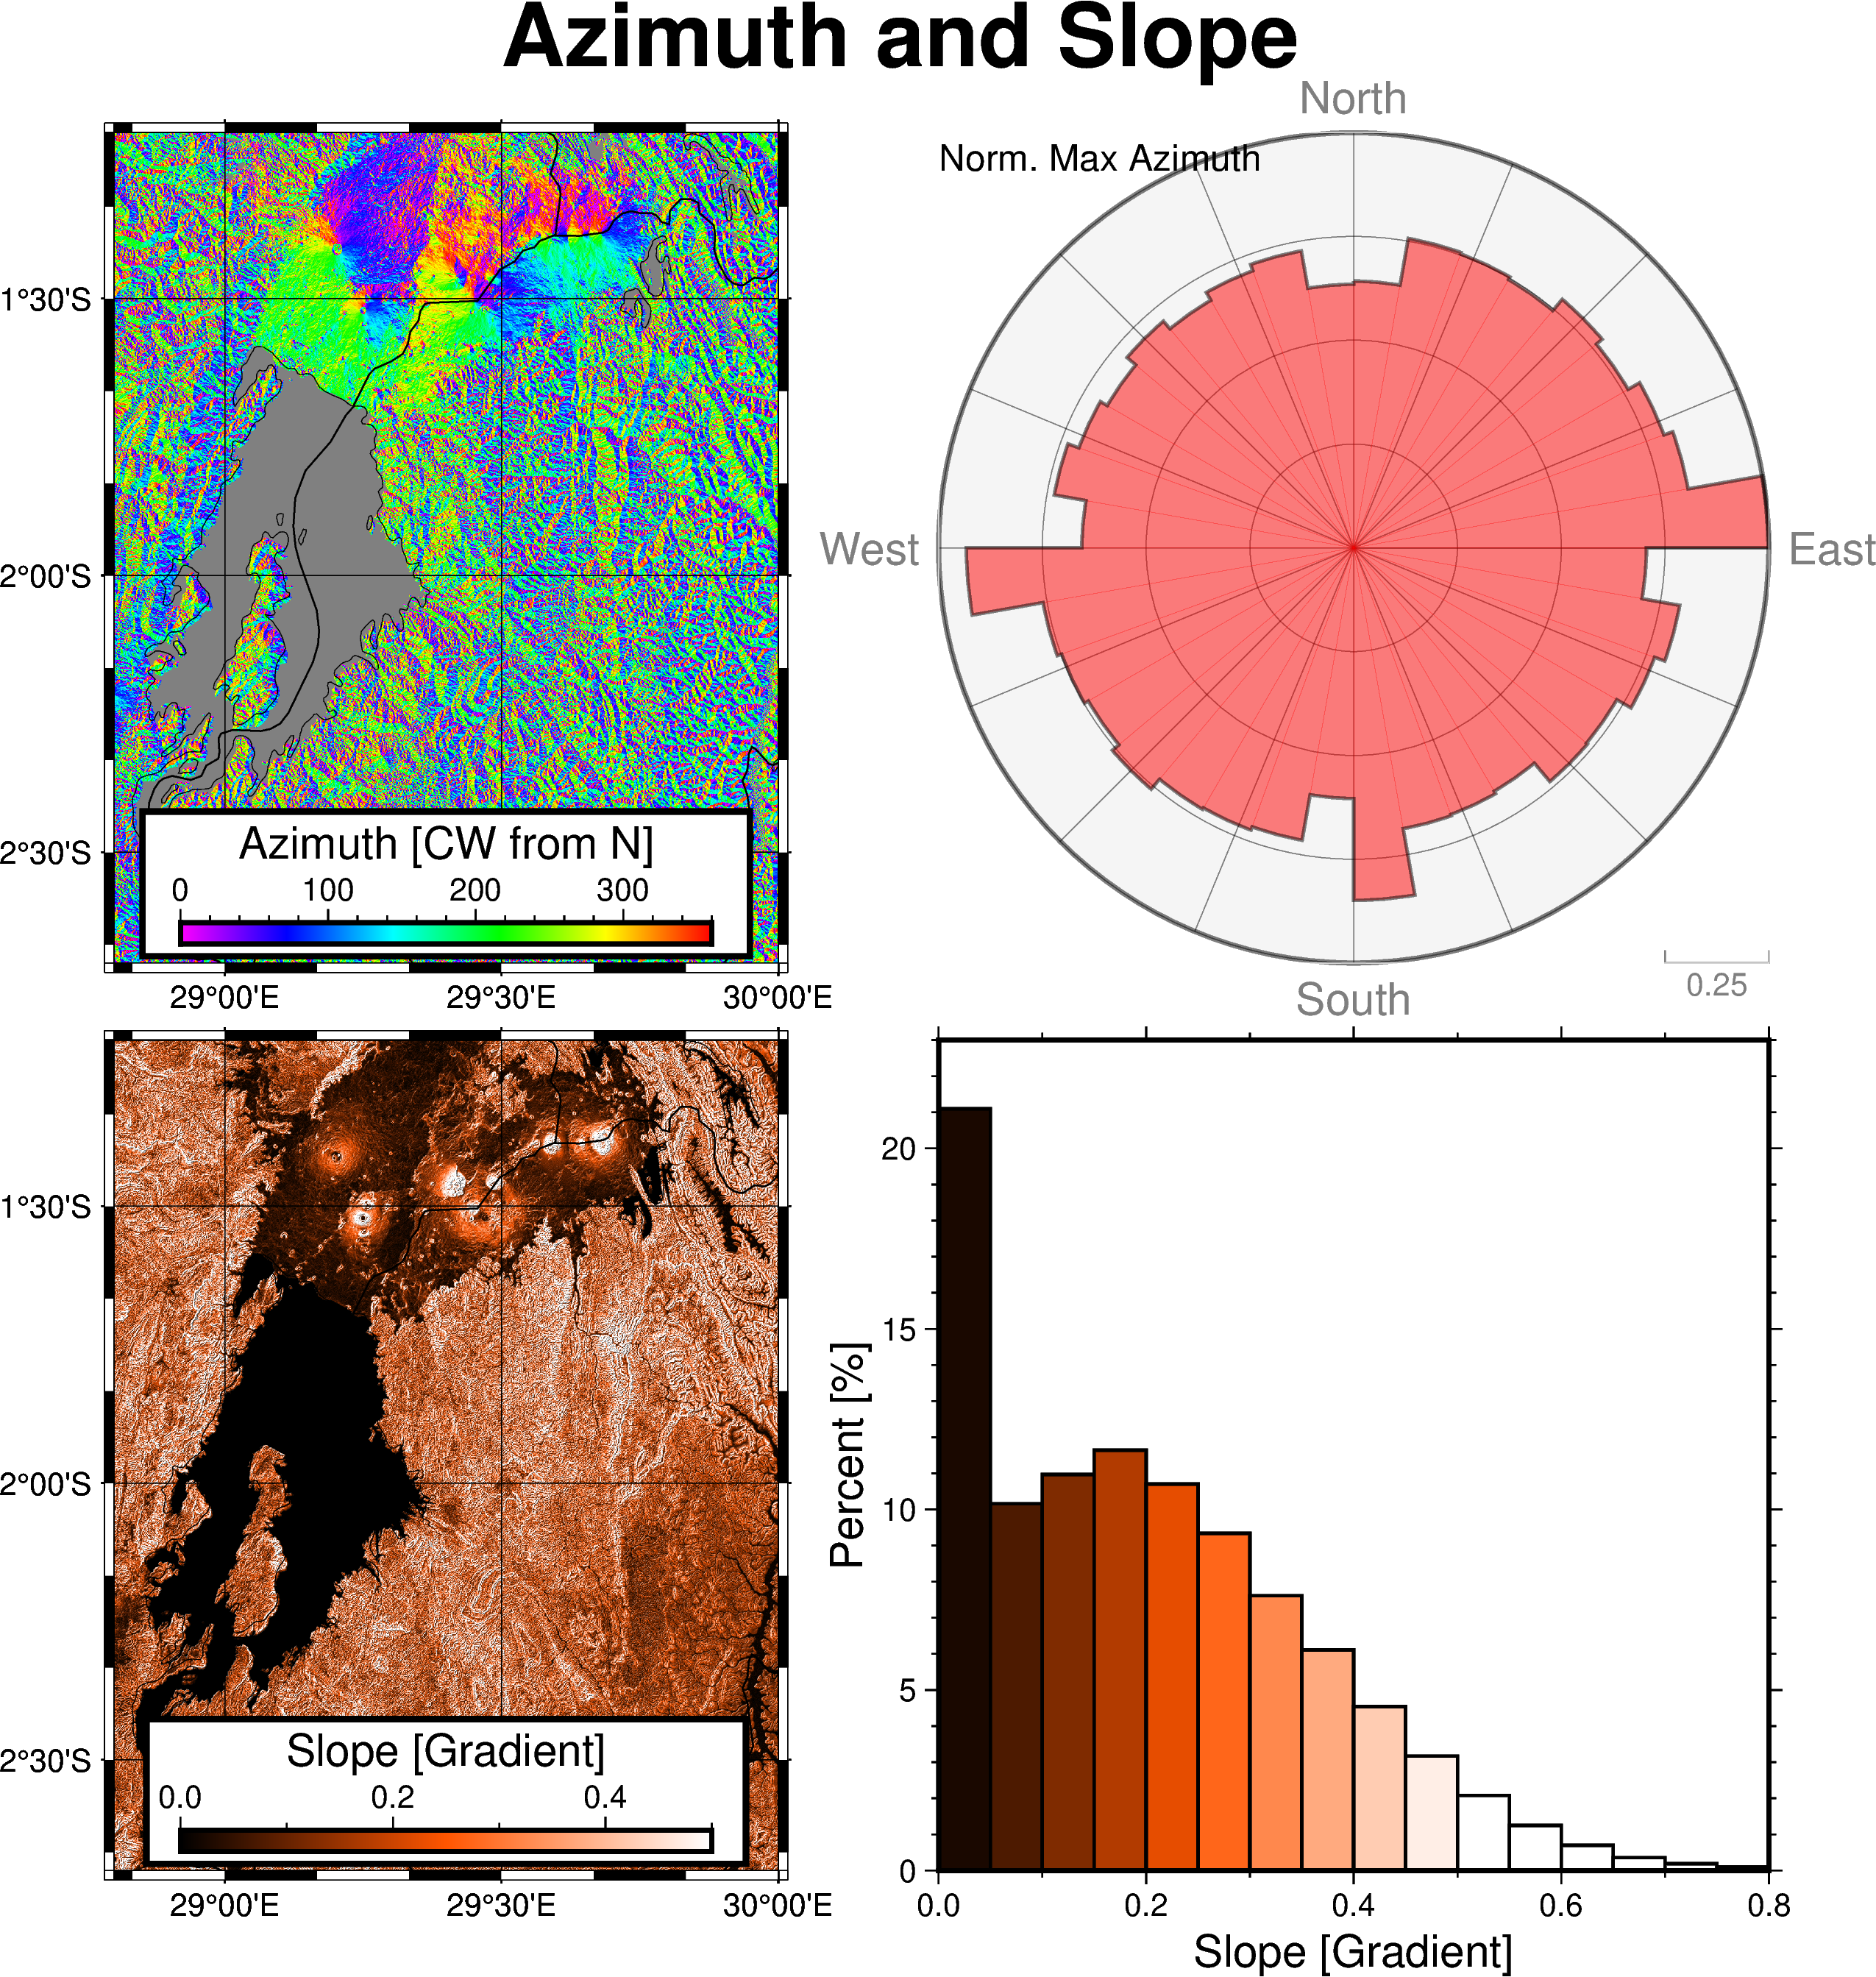

In [6]:
import numpy as np
import pandas as pd

fig4=pygmt.Figure()

with fig4.subplot(nrows=2,ncols=2,figsize=('20c','20c'),
              title='Azimuth and Slope'):
    with fig4.set_panel(panel=0):
        pygmt.makecpt(series=[0,360,45],  
              continuous=True,
              cmap='rainbow')
        fig4.grdimage(azimgrd,cmap=True)
        fig4.coast(region=[xmin,xmax,ymin,ymax],  
            frame=['p','WSen','xa0.1g.5', 'ya.1g.5'], 
            resolution='h', 
            borders='1/0.5p'
            )
        fig4.coast(shorelines=['1/0.2p','2/0.2p','3/0.2p','4/0.05p'],
            resolution='f'
            )
        fig4.colorbar(
            position="jBC", 
            box="+gwhite+p2,black", # white fill
            frame=['x+lAzimuth [CW from N]']
        )
    with fig4.set_panel(panel=1):
        # a bunch of math to redistribute and bin slope values
        pdAZ = pygmt.grd2xyz(grid=azimgrd, output_type="pandas")['z']
        binwidth=10  # width of bin in degrees
        nbins=int(360/binwidth)
        bins=list(np.array(list(range(nbins+1)))*binwidth)
        labels=list(np.array(list(range(nbins)))*binwidth+binwidth/2)
        azvals=pd.cut(x=pdAZ, bins=bins, labels=labels).value_counts()
        binnedaz=np.array([azvals.index,azvals/sum(azvals)])
        
        fig4.rose(
            azimuth=binnedaz[0],
            length=binnedaz[1],
            region=[0,1,0,360],
            norm=True,
            color='red',
            transparency=50,
            sector=binwidth,
            frame=['x0.25g0.25', 'y22.5g22.5','+g235'],
            pen="1p,black"
        )
        with pygmt.config(MAP_FRAME_PEN="0,white"):
            proj="X?"
            fig4.basemap(region=[0,1,0,1], projection=proj,frame='wesn')
            fig4.text(text='Norm. Max Azimuth',x=0,y=0.97, 
                      justify="LM", font="12p,Helvetica,black", angle=0)
    
    with fig4.set_panel(panel=2):
        pygmt.makecpt(series=[0,.5,.25],  #grad
              continuous=True,
              cmap='hot')
        fig4.grdimage(slopegrd,cmap=True,shading=True) 
        fig4.coast(region=[xmin,xmax,ymin,ymax], 
            frame=['p','WSen','xa0.1g.5', 'ya.1g.5'], 
            resolution='h', 
            borders='1/0.5p'
            )
        fig4.coast(shorelines=['1/0.2p','2/0.2p','3/0.2p','4/0.05p'],
            resolution='f'
            )
        fig4.colorbar(
            position="jBC", 
            box="+gwhite+p2,black", 
            frame=['x+lSlope [Gradient]']
        )
         
    with fig4.set_panel(panel=3):
        grid_dist = pygmt.grd2xyz(grid=slopegrd, output_type="pandas")['z']
        pygmt.makecpt(series=[0,.5,.25],  #grad
              continuous=True,
              cmap='hot')
        fig4.histogram(
            data=grid_dist,
            projection="X?",
            region=[0,0.8,0,23], # bounding box
            series=[0,0.8,0.05], # range an bin size
            frame=["p",'WSen','xa0.1+lSlope [Gradient]', 'y5a10+lPercent [%]'],
            cmap=True,
            histtype=1, # percent of total
            pen="1p,black"
        )
            
fig4.show()